In [1]:
import findspark
findspark.init('/home/user/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('appointment').getOrCreate()


In [12]:
df = spark.read.csv('MedicalAppointment.csv',header=True,inferSchema=True)
df.show()

+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
|          PatientId|AppointmentID|Gender|        ScheduledDay|      AppointmentDay|Age|    Neighbourhood|Scholarship|Hipertension|Diabetes|Alcoholism|Handcap|SMS_received|No-show|
+-------------------+-------------+------+--------------------+--------------------+---+-----------------+-----------+------------+--------+----------+-------+------------+-------+
| 2.9872499824296E13|      5642903|     F|2016-04-30 06:38:...|2016-04-29 12:00:...| 62|  JARDIM DA PENHA|          0|           1|       0|         0|      0|           0|     No|
|5.58997776694438E14|      5642503|     M|2016-04-30 04:08:...|2016-04-29 12:00:...| 56|  JARDIM DA PENHA|          0|           0|       0|         0|      0|           0|     No|
|  4.262962299951E12|      5642549|     F|2016-04-30 04:19:...|2016-04-29 12:00:...| 62|    MAT

In [23]:
df.printSchema()
#print(df.head(1))

root
 |-- PatientId: double (nullable = true)
 |-- AppointmentID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- ScheduledDay: timestamp (nullable = true)
 |-- AppointmentDay: timestamp (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Neighbourhood: string (nullable = true)
 |-- Scholarship: integer (nullable = true)
 |-- Hipertension: integer (nullable = true)
 |-- Diabetes: integer (nullable = true)
 |-- Alcoholism: integer (nullable = true)
 |-- Handcap: integer (nullable = true)
 |-- SMS_received: integer (nullable = true)
 |-- No-show: string (nullable = true)



In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

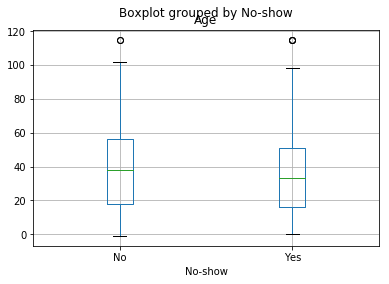

In [39]:
df1 = pd.read_csv('MedicalAppointment.csv')
df1.boxplot(column = 'Age', by = 'No-show')

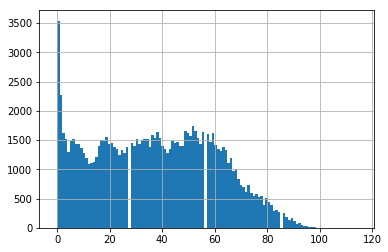

In [40]:
df1['Age'].hist(bins=120)

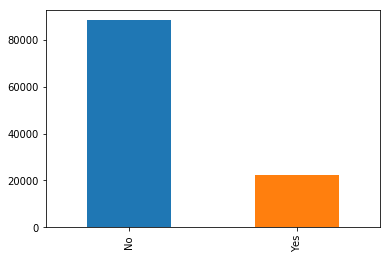

In [55]:
temp1 = df1['No-show'].value_counts()
temp1.plot(kind = 'bar')

In [50]:
df1['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

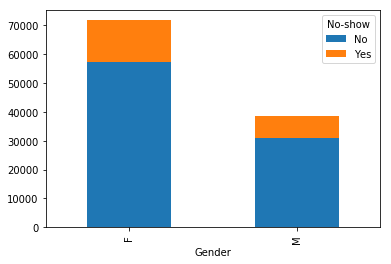

In [61]:

temp1=pd.crosstab(df1['Gender'],df1['No-show'])
temp1.plot(kind='bar', stacked=True)